In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid')

##  Heatmap

                A         B         C         D         E         F         G  \
cell_no                                                                         
510038   0.239474  2.626761  1.453125  0.991597  1.192661  1.009259  1.089109   
510035   1.260079  0.719464  1.273376  1.064207  1.398944  0.860147  0.996914   
510056   0.980263  0.626092  1.147541  1.382447  1.515478  0.615897  1.274390   
510057   1.614759  2.178089  1.516391  0.992895  6.379272  0.949055  0.950815   
510062   3.772358  0.457249  2.042254  0.717286  1.531353  1.168539  1.507299   

                H         I  
cell_no                      
510038   0.861789  0.514205  
510035   0.579415  1.149343  
510056   1.170391  0.800647  
510057   0.858115  1.054681  
510062   1.144509  0.881250  


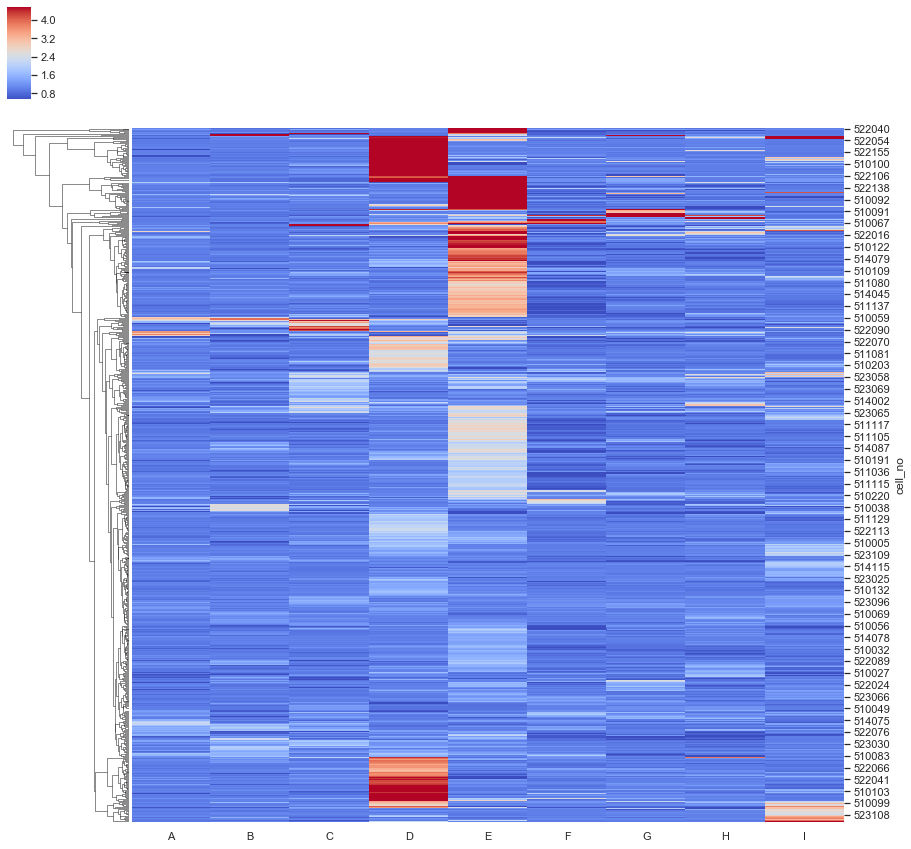

In [35]:
df = pd.read_csv("Book1sample.csv", index_col='cell_no')
df = df[(df['A'] > 1.3) | (df['B'] > 1.3) | (df['C'] > 1.3) | (df['D'] > 1.3) |
        (df['E'] > 1.3) | (df['F'] > 1.3) | (df['G'] > 1.3) | (df['H'] > 1.3) |
        (df['I'] > 1.3)]
print(df.head())
ax = sns.clustermap(df2,
                    method="complete",
                    cmap="coolwarm",
                    col_cluster=False,
                    robust=True,
                    figsize=(15, 15))

## **Swarmplot**



   cell no.         A         B         C         D         E         F  \
1    510038  0.239474  2.626761  1.453125  0.991597  1.192661  1.009259   
2    510035  1.260079  0.719464  1.273376  1.064207  1.398944  0.860147   
3    510056  0.980263  0.626092  1.147541  1.382447  1.515478  0.615897   

          G         H         I   size  
1  1.089109  0.861789  0.514205  small  
2  0.996914  0.579415  1.149343  small  
3  1.274390  1.170391  0.800647  small  
            size treatment  intensity
cell no.                             
510001    medium         A   1.008010
510003     small         A   1.032310
510004    medium         A   0.484779


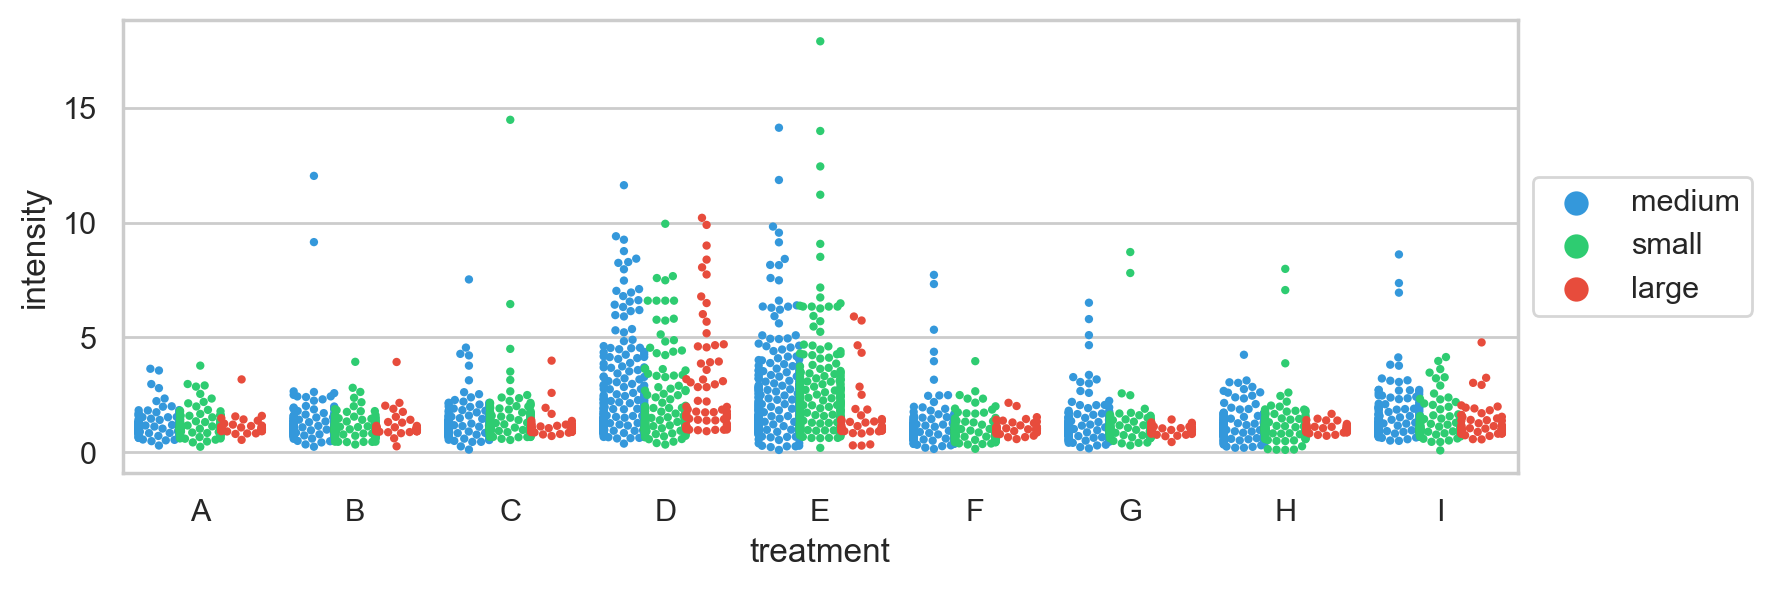

In [36]:
df = pd.read_csv('df_size.csv', index_col=None)
df = df[(df['A'] > 1.3) | (df['B'] > 1.3) | (df['C'] > 1.3) | (df['D'] > 1.3) |
        (df['E'] > 1.3) | (df['F'] > 1.3) | (df['G'] > 1.3) | (df['H'] > 1.3) |
        (df['I'] > 1.3)]
print(df.head(3))

df1 = df.melt(id_vars=['cell no.', 'size'],
              value_vars=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
              var_name='treatment',
              value_name='intensity')

df2 = df1.sort_values(by=['treatment', 'cell no.'], ascending=True)
df3 = df2.set_index('cell no.')
print(df3.head(3))

plt.figure(dpi=200, figsize=(9, 3))
sns.set(style='whitegrid')
rgb = ["#3498db", "#2ecc71", "#e74c3c"]
ax = sns.swarmplot(x='treatment',
                   y='intensity',
                   hue='size',
                   palette=rgb,
                   dodge=True,
                   size=3,
                   data=df3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Pairplot

   cell no.         A         B         C         D         E         F  \
1    510038  0.239474  2.626761  1.453125  0.991597  1.192661  1.009259   
2    510035  1.260079  0.719464  1.273376  1.064207  1.398944  0.860147   
3    510056  0.980263  0.626092  1.147541  1.382447  1.515478  0.615897   
4    510057  1.614759  2.178089  1.516391  0.992895  6.379272  0.949055   
5    510062  3.772358  0.457249  2.042254  0.717286  1.531353  1.168539   

          G         H         I   size  
1  1.089109  0.861789  0.514205  small  
2  0.996914  0.579415  1.149343  small  
3  1.274390  1.170391  0.800647  small  
4  0.950815  0.858115  1.054681  small  
5  1.507299  1.144509  0.881250  small  
(704, 11)
                 A         B         C         D         E         F  \
cell no.                                                               
523131    1.066586  0.931744  1.079136  1.460703  1.022603  0.951813   
510144    0.956640  0.956814  0.776043  2.211366  1.005774  1.016949   
51014

<Figure size 1800x600 with 0 Axes>

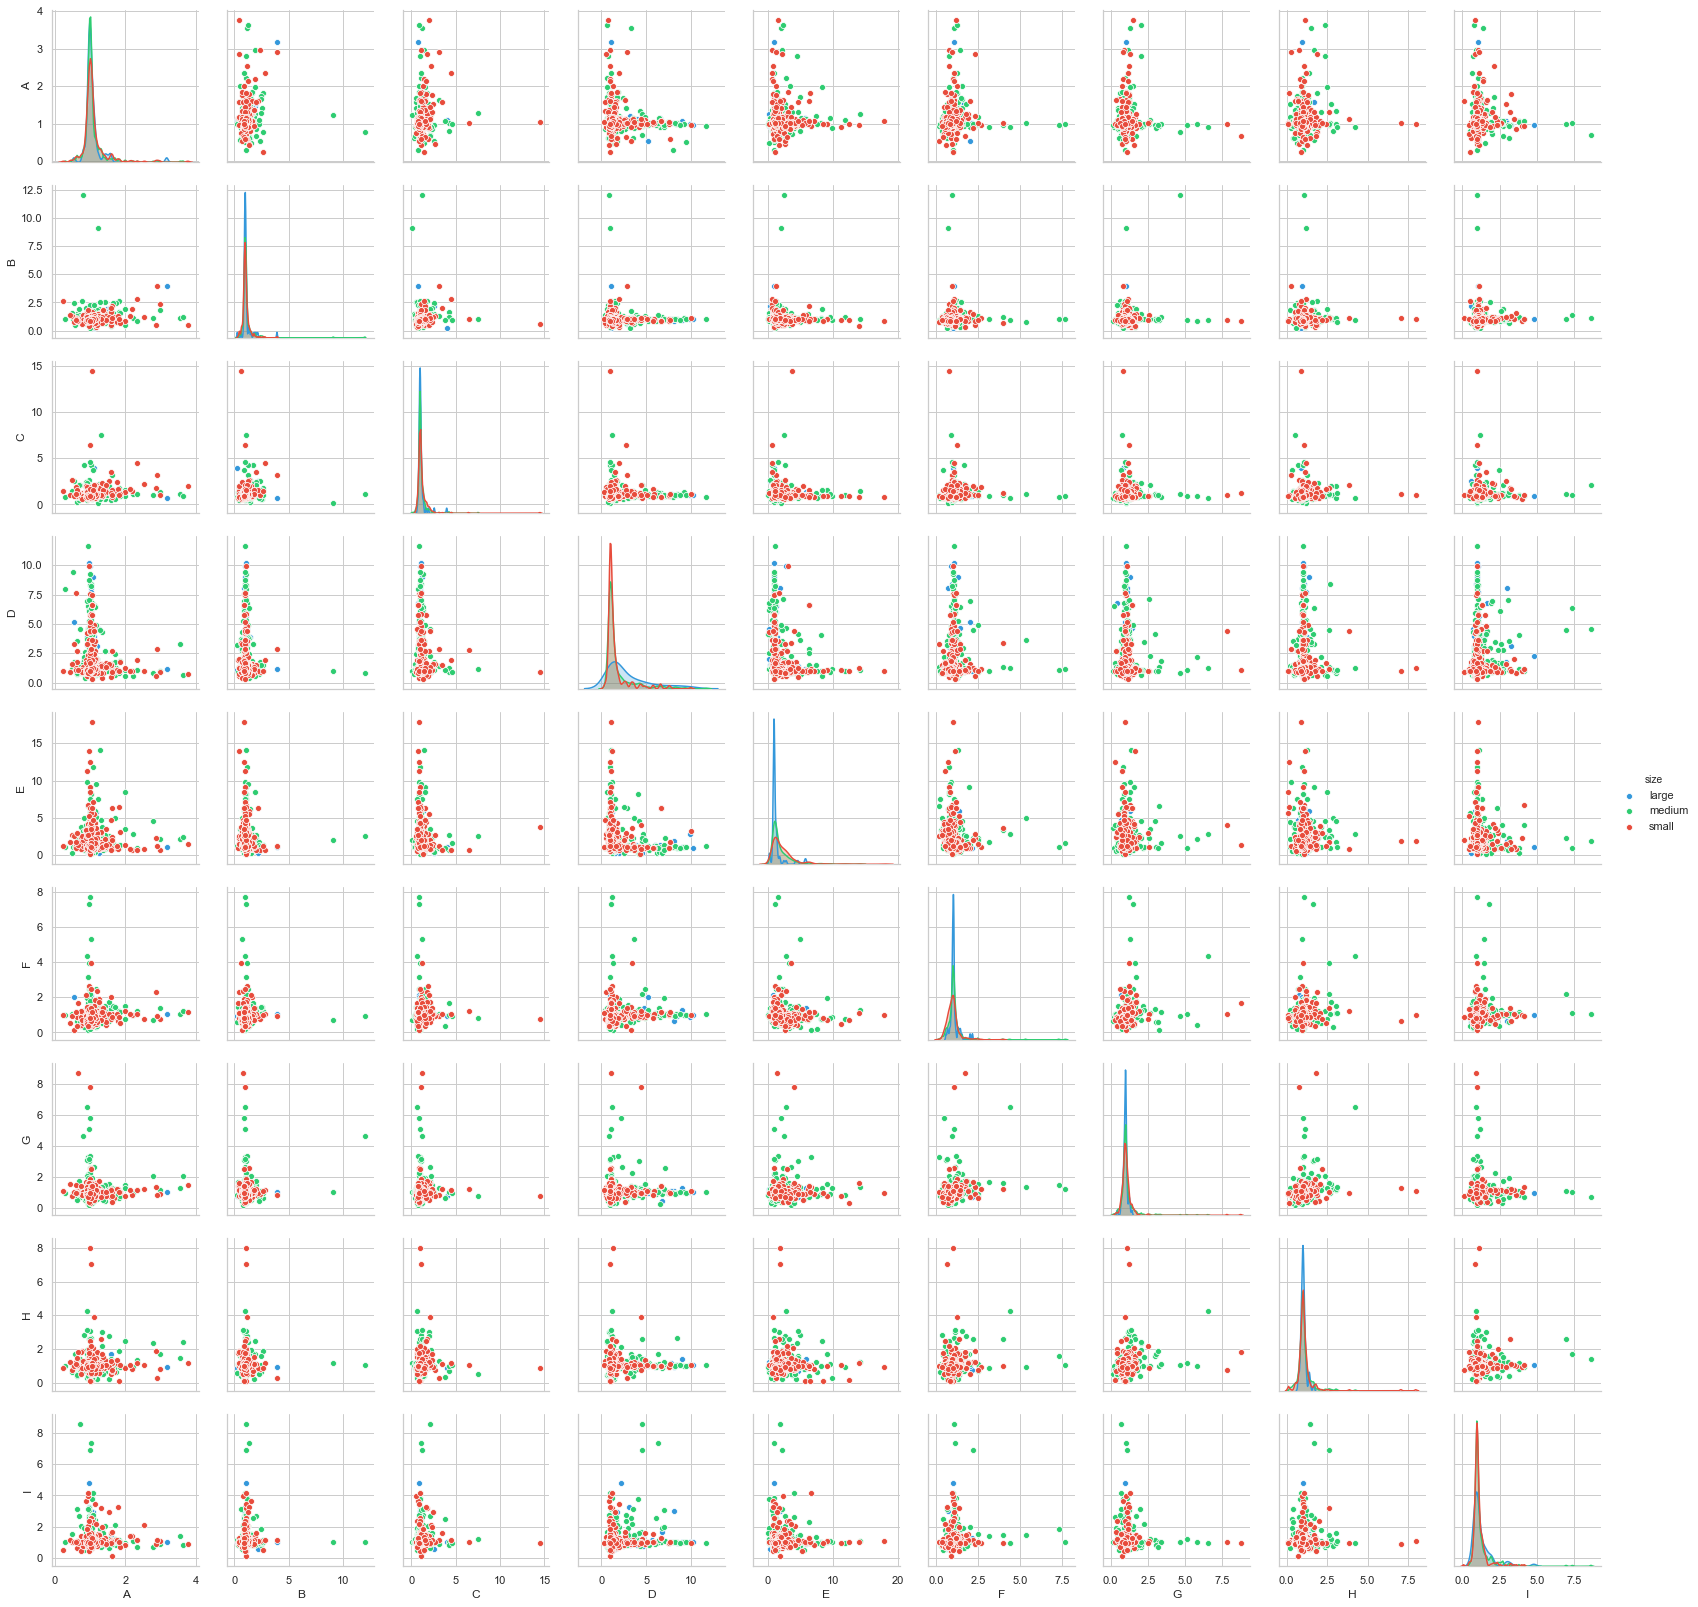

In [5]:
df = pd.read_csv('df_size.csv', index_col=None)
df = df[(df['A'] > 1.3) | (df['B'] > 1.3) | (df['C'] > 1.3) | (df['D'] > 1.3) |
        (df['E'] > 1.3) | (df['F'] > 1.3) | (df['G'] > 1.3) | (df['H'] > 1.3) |
        (df['I'] > 1.3)]
print(df.head())

df1 = df.sort_values(by=['size'], ascending=True)
df2 = df1.set_index('cell no.')
print(df2.head(3))
print(df.shape)

plt.figure(dpi=200, figsize=(9, 3))
sns.set(style='whitegrid')
rgb = ["#3498db", "#2ecc71", "#e74c3c"]
ax = sns.pairplot(hue='size', palette=rgb, data=df2)

## Sklearn

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
df = pd.read_csv('df_size.csv', index_col=None)
df = df[(df['A'] > 1.3) | (df['B'] > 1.3) | (df['C'] > 1.3) | (df['D'] > 1.3) |
        (df['E'] > 1.3) | (df['F'] > 1.3) | (df['G'] > 1.3) | (df['H'] > 1.3) |
        (df['I'] > 1.3)]


X, y = df.drop('size', axis=1), df['size']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X, y)
predictions = svc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 12   3   0]
 [  0 125   2]
 [  0   9  61]]
              precision    recall  f1-score   support

       large       1.00      0.80      0.89        15
      medium       0.91      0.98      0.95       127
       small       0.97      0.87      0.92        70

    accuracy                           0.93       212
   macro avg       0.96      0.89      0.92       212
weighted avg       0.94      0.93      0.93       212



In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 10   5   0]
 [  5 106  16]
 [  3  13  54]]
              precision    recall  f1-score   support

       large       0.56      0.67      0.61        15
      medium       0.85      0.83      0.84       127
       small       0.77      0.77      0.77        70

    accuracy                           0.80       212
   macro avg       0.73      0.76      0.74       212
weighted avg       0.81      0.80      0.80       212



In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X, y)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 12   3   0]
 [ 10 103  14]
 [  4  10  56]]
              precision    recall  f1-score   support

       large       0.46      0.80      0.59        15
      medium       0.89      0.81      0.85       127
       small       0.80      0.80      0.80        70

    accuracy                           0.81       212
   macro avg       0.72      0.80      0.74       212
weighted avg       0.83      0.81      0.81       212



In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[  6   8   1]
 [  4 110  13]
 [  3  19  48]]
              precision    recall  f1-score   support

       large       0.46      0.40      0.43        15
      medium       0.80      0.87      0.83       127
       small       0.77      0.69      0.73        70

    accuracy                           0.77       212
   macro avg       0.68      0.65      0.66       212
weighted avg       0.77      0.77      0.77       212



//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_transformed = sc.transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)
print(X.head(), '\n', X_transformed.head())

   cell no.         A         B         C         D         E         F  \
1    510038  0.239474  2.626761  1.453125  0.991597  1.192661  1.009259   
2    510035  1.260079  0.719464  1.273376  1.064207  1.398944  0.860147   
3    510056  0.980263  0.626092  1.147541  1.382447  1.515478  0.615897   
4    510057  1.614759  2.178089  1.516391  0.992895  6.379272  0.949055   
5    510062  3.772358  0.457249  2.042254  0.717286  1.531353  1.168539   

          G         H         I  
1  1.089109  0.861789  0.514205  
2  0.996914  0.579415  1.149343  
3  1.274390  1.170391  0.800647  
4  0.950815  0.858115  1.054681  
5  1.507299  1.144509  0.881250   
    cell no.         A         B         C         D         E         F  \
0 -0.936717 -2.485828  2.468301  0.357183 -0.523926 -0.491857 -0.040100   
1 -0.937260  0.521713 -0.625054  0.116486 -0.481450 -0.379445 -0.317353   
2 -0.933461 -0.302854 -0.776490 -0.052016 -0.295285 -0.315941 -0.771501   
3 -0.933280  1.566891  1.740621  0.441900 -

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
print(X_test.head())
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

     cell no.         A         B         C         D         E         F  \
296 -0.742214 -0.361944 -0.295418 -0.281811 -0.557646  0.025192 -0.765068   
81  -0.928756 -0.192428 -0.088419  0.087103 -0.137718  1.089135  0.003243   
77  -0.931289  7.301621  0.050584 -0.030283  0.813945  0.000771  0.040266   
208 -0.761212  0.113958  0.224779 -0.027535 -0.608604 -0.457881 -0.237353   
318 -0.738053 -0.798643 -0.575962 -0.704469 -0.532678 -0.376966 -1.225956   

            G         H         I  
296 -0.112468 -0.128418 -0.622494  
81  -1.309671 -0.642808  2.119112  
77   0.365026  0.741497  0.318288  
208 -0.471345  0.630304 -0.260942  
318  0.148646 -0.231100 -1.023814  
[[ 1 10  4]
 [18 81 28]
 [ 3 44 23]]
              precision    recall  f1-score   support

       large       0.05      0.07      0.05        15
      medium       0.60      0.64      0.62       127
       small       0.42      0.33      0.37        70

    accuracy                           0.50       212
   macro avg

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Orignial dataset shape:", X.shape)
print("Reduced dataset shape:", X_reduced.shape)

Orignial dataset shape: (704, 9)
Reduced dataset shape: (704, 2)


           A         B         C         D         E         F         G  \
x_  0.008532 -0.001815 -0.003005 -0.531346  0.845515 -0.025985  0.006395   
y_ -0.022524 -0.040159 -0.044834  0.844184  0.531495  0.000294  0.012162   

           H         I  
x_ -0.007934 -0.043727  
y_ -0.008806  0.022597  


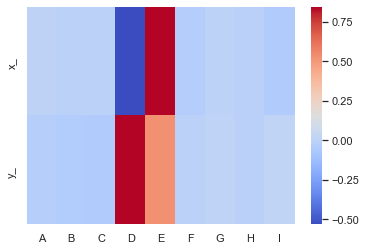

In [40]:
components = pd.DataFrame(
    pca.components_,
    index=['x_', 'y_'],
    columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
print(components.head())
sns.heatmap(data=components, cmap='coolwarm')  # Relationship to original columns

         x_        y_   size
0 -0.715345 -0.900332    NaN
1 -1.085744 -0.284686  small
2 -1.488416  0.591188  small
3 -2.462863  1.795206  small
4  2.300599  0.544723  small


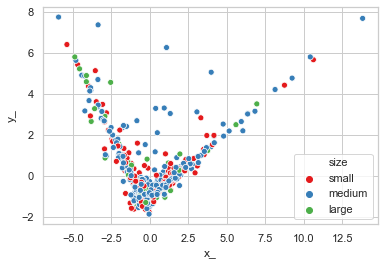

In [61]:
X_reduced_df = pd.DataFrame(X_reduced, columns=['x_', 'y_'])
X_reduced_df['size'] = pd.DataFrame(y)
print(X_reduced_df.head())
sns.scatterplot(x='x_', y='y_', data=X_reduced_df, hue='size', palette='Set1')

In [84]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
X_reduced = iso.fit_transform(X)

            x_        y_   size
0    95.478193  0.026143    NaN
1    99.312876  0.013128  small
2    75.979453  0.084412  small
3    76.519424  0.081980  small
4    69.549053  0.100336  small
5    55.438657  0.130673  small
6    16.685472  0.178002  small
7    -3.705131  0.181855  small
8   -20.016527  0.173276    NaN
9  -123.272100 -0.110882  small
10  134.164238 -0.128285  small
11  128.991519 -0.104677  small
12  121.211615 -0.070887  small
13  109.344130 -0.023315  small
14  107.670088 -0.016996  small
15  104.206352 -0.004230    NaN
16  102.431097  0.002171    NaN
17  101.497540  0.005453  small
18  100.161983  0.010161  small
19   98.202535  0.016843    NaN
20   90.171192  0.043248  small
21   90.627799  0.041428  small
22   87.770814  0.050760  small
23   86.784100  0.053740  small
24   80.262765  0.072748  small
25   72.935213  0.092089  small
26   70.439763  0.098043  small
27   65.512699  0.109176  small
28   61.110143  0.119858  small
29   59.464170  0.123226    NaN
30   55.

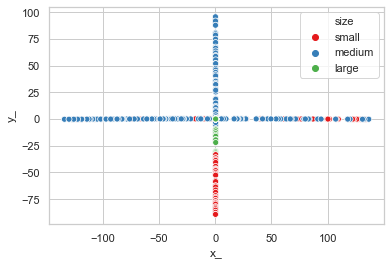

In [92]:
X_reduced_df = pd.DataFrame(X_reduced, columns=['x_', 'y_'])
X_reduced_df['size'] = pd.DataFrame(y)
print(X_reduced_df.head(40))
sns.scatterplot(x='x_', y='y_', data=X_reduced_df, hue='size', palette='Set1')

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('size', axis=1),
                                                    df2['size'],
                                                    test_size=0.3,
                                                    random_state=42)

In [88]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

[[  0   0   0]
 [ 22 107  45]
 [  2  19  17]]
              precision    recall  f1-score   support

       large       0.00      0.00      0.00         0
      medium       0.85      0.61      0.71       174
       small       0.27      0.45      0.34        38

    accuracy                           0.58       212
   macro avg       0.37      0.35      0.35       212
weighted avg       0.75      0.58      0.65       212



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


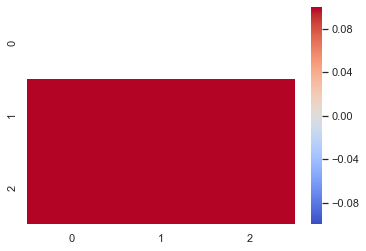

In [89]:
print(confusion_matrix(predictions, y_test))
print(classification_report(predictions, y_test))
sns.heatmap(np.log(confusion_matrix(predictions, y_test)), cmap='coolwarm')